In [1]:
data_folder = "data/datasets/books"

In [2]:
def clean_book(document):
    lines = document.split("\n")
    start= 0
    end = len(lines)
    for i in range(len(lines)):
        line = lines[i]
        if line.startswith("*** START OF THIS PROJECT GUTENBERG"):
            start = i + 1
        elif line.startswith("*** END OF THIS PROJECT GUTENBERG"):
            end = i - 1
    return "\n".join(lines[start:end])

In [ ]:
import numpy as np

def load_books_data(folder=data_folder):
    '''
    Get documents and classes
    Loop through folders, loads the text documents and records a # assigned to thte author as the target class
    '''
    documents = []
    authors = []
    subfolders = [subfolder for subfolder in os.listdir(folder)
                  if os.path.isdir(os.path.join(folder, subfolder))]
    for author_number, subfolder in enumerate(subfolders):
        full_subfolder_path = os.path.join(folder, subfolder)
        for document_name in os.listdir(full_subfolder_path):
            with open(os.path.join(full_subfolder_path, document_name)) as inf:
                documents.append(clean_book(inf.read()))
                authors.append(author_number)
    return documents, np.array(authors, dtype='int')

Load the books

In [ ]:
documents, classes = load_books_data(data_folder)

# Get a sense for the documents length
If the lengths are relatively consistent, it's often easier to learn from than widly different document lengths

In [ ]:
%matplotlib inline
document_lengths = [len(document) for document in documents]
import seaborn as sns
from matplotlib import pyplot as plt
sns.distplot(document_lengths)
plt.savefig("hist.png")

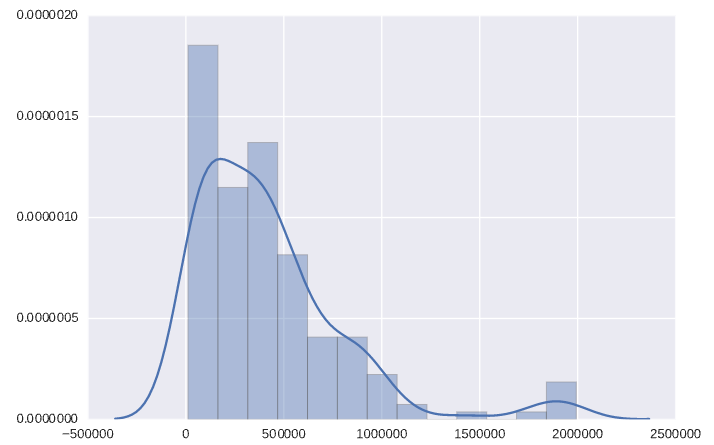

In this class, there is quite a large variance in document lengths

In [3]:
function_words = ["a", "able", "aboard", "about", "above", "absent",
                  "according" , "accordingly", "across", "after", "against",
                  "ahead", "albeit", "all", "along", "alongside", "although",
                  "am", "amid", "amidst", "among", "amongst", "amount", "an",
                    "and", "another", "anti", "any", "anybody", "anyone",
                    "anything", "are", "around", "as", "aside", "astraddle",
                    "astride", "at", "away", "bar", "barring", "be", "because",
                    "been", "before", "behind", "being", "below", "beneath",
                    "beside", "besides", "better", "between", "beyond", "bit",
                    "both", "but", "by", "can", "certain", "circa", "close",
                    "concerning", "consequently", "considering", "could",
                    "couple", "dare", "deal", "despite", "down", "due", "during",
                    "each", "eight", "eighth", "either", "enough", "every",
                    "everybody", "everyone", "everything", "except", "excepting",
                    "excluding", "failing", "few", "fewer", "fifth", "first",
                    "five", "following", "for", "four", "fourth", "from", "front",
                    "given", "good", "great", "had", "half", "have", "he",
                    "heaps", "hence", "her", "hers", "herself", "him", "himself",
                    "his", "however", "i", "if", "in", "including", "inside",
                    "instead", "into", "is", "it", "its", "itself", "keeping",
                    "lack", "less", "like", "little", "loads", "lots", "majority",
                    "many", "masses", "may", "me", "might", "mine", "minority",
                    "minus", "more", "most", "much", "must", "my", "myself",
                    "near", "need", "neither", "nevertheless", "next", "nine",
                    "ninth", "no", "nobody", "none", "nor", "nothing",
                    "notwithstanding", "number", "numbers", "of", "off", "on",
                    "once", "one", "onto", "opposite", "or", "other", "ought",
                    "our", "ours", "ourselves", "out", "outside", "over", "part",
                    "past", "pending", "per", "pertaining", "place", "plenty",
                    "plethora", "plus", "quantities", "quantity", "quarter",
                    "regarding", "remainder", "respecting", "rest", "round",
                    "save", "saving", "second", "seven", "seventh", "several",
                    "shall", "she", "should", "similar", "since", "six", "sixth",
                    "so", "some", "somebody", "someone", "something", "spite",
                    "such", "ten", "tenth", "than", "thanks", "that", "the",
                    "their", "theirs", "them", "themselves", "then", "thence",
                  "therefore", "these", "they", "third", "this", "those",
"though", "three", "through", "throughout", "thru", "thus",
"till", "time", "to", "tons", "top", "toward", "towards",
"two", "under", "underneath", "unless", "unlike", "until",
"unto", "up", "upon", "us", "used", "various", "versus",
"via", "view", "wanting", "was", "we", "were", "what",
"whatever", "when", "whenever", "where", "whereas",
"wherever", "whether", "which", "whichever", "while",
                  "whilst", "who", "whoever", "whole", "whom", "whomever",
"whose", "will", "with", "within", "without", "would", "yet",
"you", "your", "yours", "yourself", "yourselves"]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

extractor = CountVectorizer(vocabulary=function_words)
extractor.fit(documents)

# Get the counts of the function words
counts = extractor.transform(documents)

# Normalized the counts by calculating the percentage of words before plotting
normalized_counts = counts.T / np.array(document_lengths)

In [ ]:
normalized_counts.shape # return (293, 177)

In [ ]:
# Average the percentages across all documents
averaged_counts = normalized_counts.mean(axis=1)
assert averaged_counts.shape[0] == normalized_counts.shape[0]

In [ ]:
from matplotlib import pyplot as plt

plt.plot(averaged_counts)
plt.savefig('function.png')

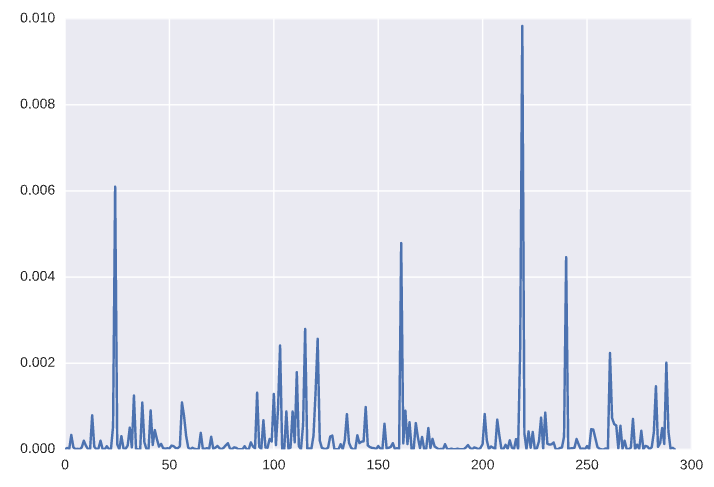

In [5]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Create a grid search to search the parameters for the best choices
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svr = SVC()
grid = GridSearchCV(svr, parameters)

pipeline1 = Pipeline([('feature_extraction', extractor),
                      ('clf', grid)])

scores = cross_val_score(pipeline1, documents, classes, scoring='f1_macro')
print(np.mean(scores))